# Remove outliers & do Subsampling
We first want to produce subsample-datasets which we use for further analysis.

We do two steps:
- Remove potential outliers
- Subsample data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"
plot_path = "plots/"

In [4]:
table2 = pd.read_csv(data_path + "datasets_v2/20190703_dataset_table2_analysis.csv", sep=";")

### Remove Outliers

In [5]:
table2.shape

(46451, 74)

In [7]:
table2 = table2[(table2["sex"] != "non-binary") & (table2["age"] >= 15) & (table2["age"] < 65)] # & (table2["employment"] != "seeking-work") & (table2["familyStatus"] != "single-parent")]
table2.shape

(44349, 74)

In [8]:
table2["level"].unique()

array(['G', 'F', 'M', 'H', 'L', 'I', 'K', 'E', 'B', 'D', 'A', 'C', nan],
      dtype=object)

In [9]:
# no negative feature scores
table2 = table2[(table2["level"]!="N") & (table2["level"]!="O") & (table2["level"]!="P")]
table2["level"].unique()

array(['G', 'F', 'M', 'H', 'L', 'I', 'K', 'E', 'B', 'D', 'A', 'C', nan],
      dtype=object)

In [10]:
table2 = table2[table2["score"]>0]

## Versandhandel

### Cut/Transform score & Subsampling

Dimensions: (1625, 74)


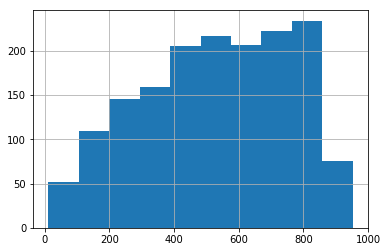

In [11]:
domain = "Versandhandel"
version = 1

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 1000]

df_data["score"].hist()

In [12]:
def plot_age_comparison(df):
    values = [0.111, 0.06, 0.118, 0.166, 0.204]
    values = (np.array(values)/np.sum(values)).tolist()

    chars = ["15-24", "25-29", "30-39", "40-49", "50-64"]
    col = "age_class"

    tmp = df[col].value_counts().div(df[col].value_counts().sum()).reindex(chars).values
    tmp = pd.DataFrame(np.array([tmp, values]).T, columns=["Datensatz", "Population"], index=chars)
    ax = tmp.plot(kind="bar", figsize=(10,8))

In [13]:
def subsample_sex(df):
    # save female participants
    df_female = df[df["sex"]=="female"]
    # save male in other df
    df_male = df[df["sex"]=="male"]
    # Sample from male participants
    df_male = df_male.sample(frac=.11, replace=False, random_state=42)
    df_sex = df_female.append(df_male, sort=False)
    
    return df_sex

def subsample_age(df):
    # save 30-39 years old participants
    df_3039 = df[df["age_class"]=="30-39"]
    # save 25-29 years old participants
    df_2539 = df[df["age_class"]=="25-29"]
    # save 40-49 years old participants
    df_4049 = df[df["age_class"]=="40-49"]
    
    # save others in other df
    df_others = df[(df["age_class"]!="30-39") & (df["age_class"]!="25-29") & (df["age_class"]!="40-49")]
    
    df_3039 = df_3039.sample(frac=.33, replace=False, random_state=13)
    df_2539 = df_2539.sample(frac=.33, replace=False, random_state=13)
    df_4049 = df_4049.sample(frac=.9, replace=False, random_state=13)
    df_age = df_others.append([df_3039, df_2539, df_4049], sort=False)
    
    return df_age

(985, 74)

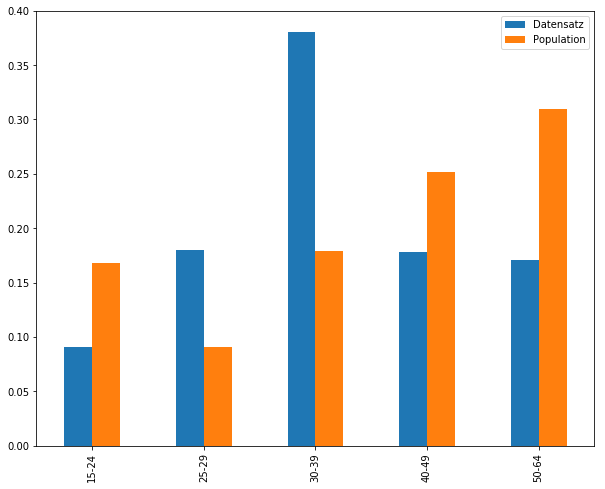

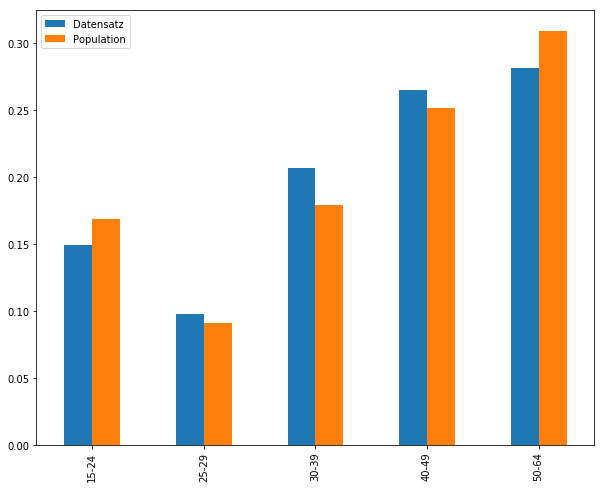

In [14]:
df_original_vs1 = df_data

df_sex_vs1 = subsample_sex(df_data)

df_age_vs1 = subsample_age(df_data)

plot_age_comparison(df_original_vs1)
plot_age_comparison(df_age_vs1)
df_age_vs1.shape

Dimensions: (1675, 74)


(1011, 74)

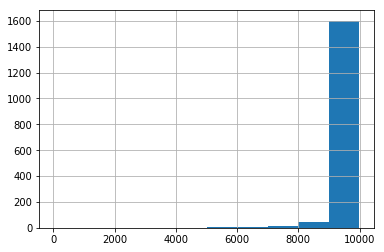

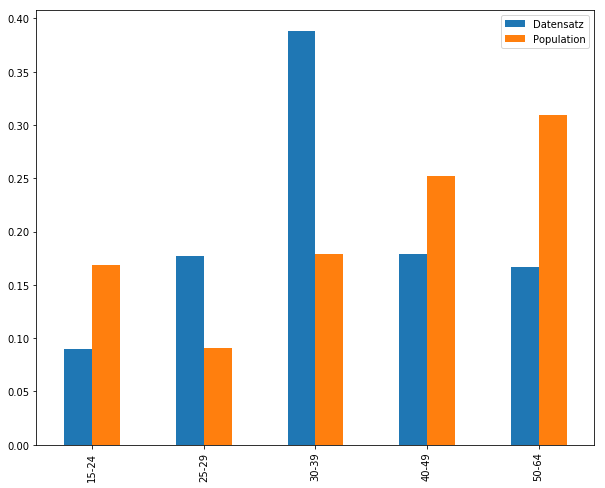

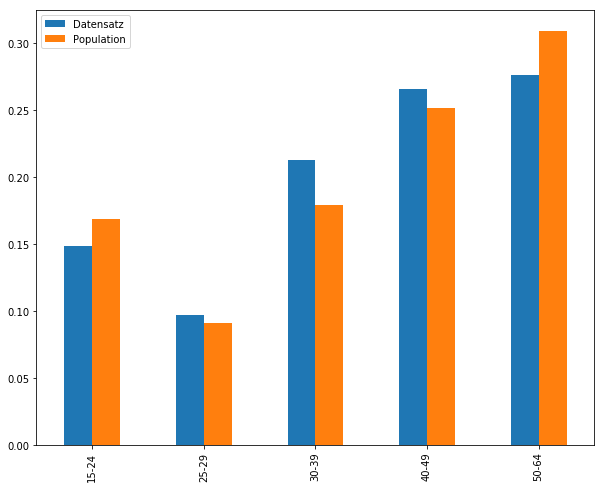

In [15]:
domain = "Versandhandel"
version = 2

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 10000]

df_data["score"].hist()

df_original_vs2 = df_data
df_sex_vs2 = subsample_sex(df_data)
df_age_vs2 = subsample_age(df_data)

plot_age_comparison(df_original_vs2)
plot_age_comparison(df_age_vs2)
df_age_vs2.shape

Dimensions: (1682, 74)


(1022, 74)

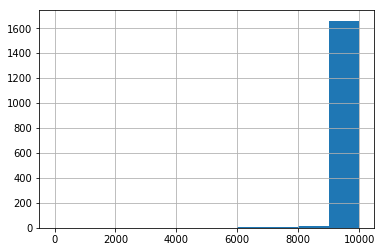

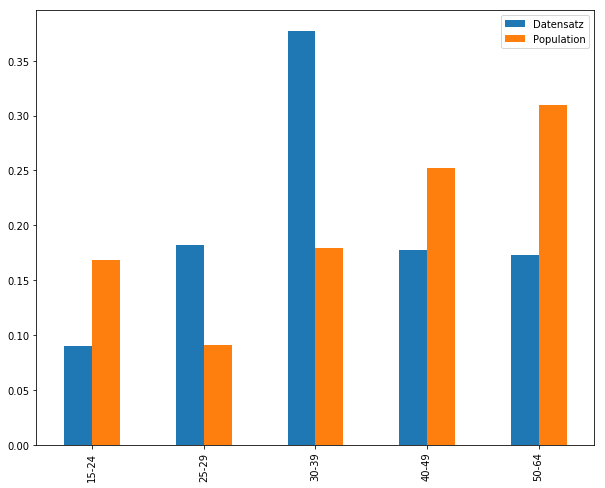

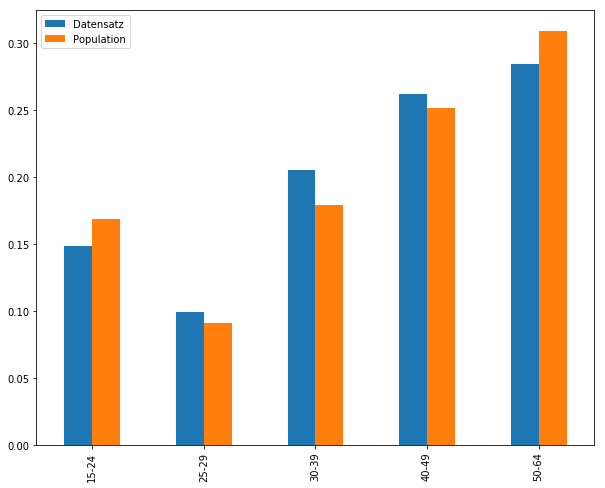

In [16]:
domain = "Versandhandel"
version = 3

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 10000]

df_data["score"].hist()

df_original_vs3 = df_data
df_sex_vs3 = subsample_sex(df_data)
df_age_vs3 = subsample_age(df_data)

plot_age_comparison(df_original_vs3)
plot_age_comparison(df_age_vs3)
df_age_vs3.shape

Dimensions: (1644, 74)


(995, 74)

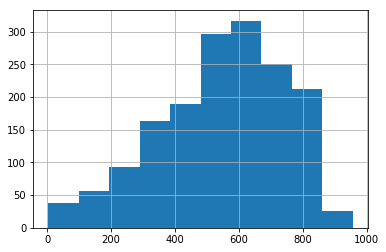

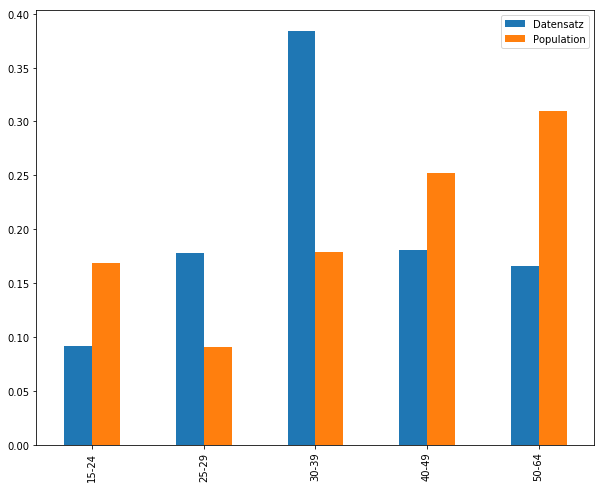

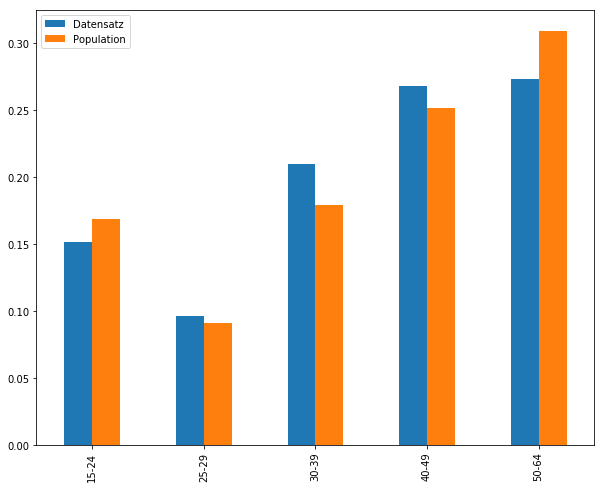

In [17]:
domain = "Banken"
version = 1

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 1000]

df_data["score"].hist()

df_original_b1 = df_data
df_sex_b1 = subsample_sex(df_data)
df_age_b1 = subsample_age(df_data)

plot_age_comparison(df_original_b1)
plot_age_comparison(df_age_b1)
df_age_b1.shape

Dimensions: (1656, 74)


(1001, 74)

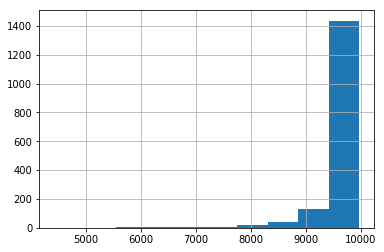

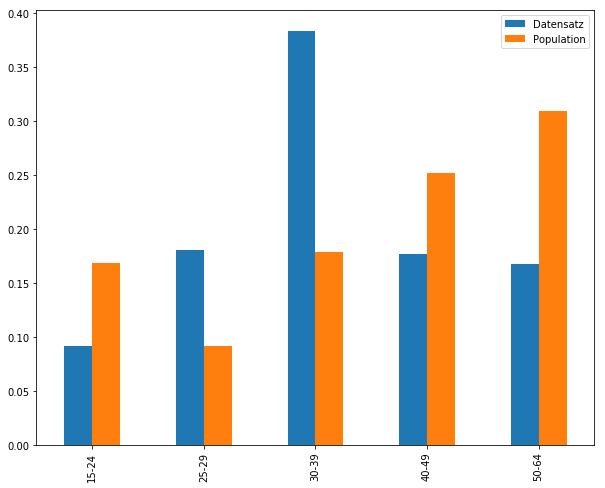

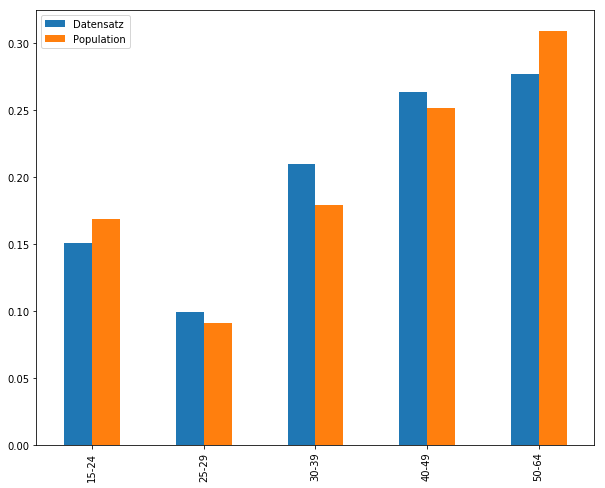

In [18]:
domain = "Banken"
version = 2

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 10000]

df_data["score"].hist()

df_original_b2 = df_data
df_sex_b2 = subsample_sex(df_data)
df_age_b2 = subsample_age(df_data)

plot_age_comparison(df_original_b2)
plot_age_comparison(df_age_b2)
df_age_b2.shape

Dimensions: (1587, 74)


(964, 74)

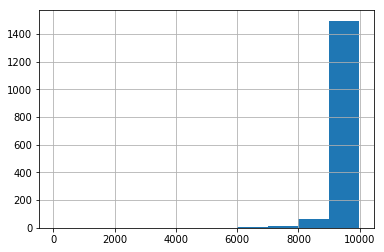

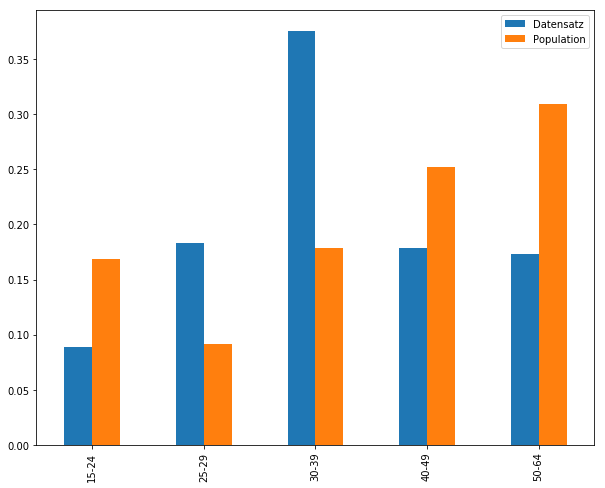

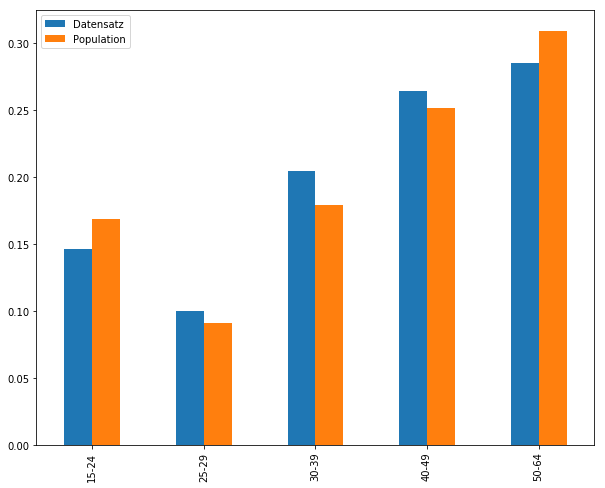

In [19]:
domain = "Banken"
version = 3

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]
print("Dimensions:", df_data.shape)

df_data = df_data[df_data["score"] <= 10000]

df_data["score"].hist()

df_original_b3 = df_data
df_sex_b3 = subsample_sex(df_data)
df_age_b3 = subsample_age(df_data)

plot_age_comparison(df_original_b3)
plot_age_comparison(df_age_b3)
df_age_b3.shape

In [20]:
# Append datasets to one big dataset per subsample
df_original = df_original_vs1.append([df_original_vs2, df_original_vs3, df_original_b1, df_original_b2, df_original_b3], sort=False)

df_sex = df_sex_vs1.append([df_sex_vs2, df_sex_vs3, df_sex_b1, df_sex_b2, df_sex_b3], sort=False)

df_age = df_age_vs1.append([df_age_vs2, df_age_vs3, df_age_b1, df_age_b2, df_age_b3], sort=False)

### Remove outlier feautre attributes

In [28]:
df_original.columns

Index(['id', 'date', 'table', 'customer', 'feature', 'domain', 'version',
       'score', 'value', 'level', 'meaning', 'stoerung', 'kredit_jahr',
       'kredit_nutzung', 'kredit_historie', 'allgemein', 'anschrift',
       'all_columns_text', 'activeLoanAmount', 'admonition', 'cashing',
       'employment', 'executionProceedings', 'familyStatus', 'housing',
       'insolvencyProceedings', 'mailOrder', 'migrationBackground',
       'monthlyIncome', 'numberOfActiveLoans', 'numberOfChildren',
       'numberOfCreditCards', 'numberOfGiroAccounts',
       'numberOfMobileContracts', 'numberOfPaidOffLoans', 'paidOffLoanAmount',
       'plz', 'relocation', 'schufaDate', 'sex', 'yearOfBirth', 'foreigner',
       'basisscore', 'plz_one', 'east_west', 'age', 'age_class', 'age_gen',
       'request', 'banking_connection', 'business_relation', 'conditions',
       'credit_card', 'giro', 'global_credit', 'identity', 'secured_loan',
       'solvency', 'telecom', 'unsecured_loan', 'Banken_req',
       

In [32]:
# Separate Columns into data types as well as predictors and target

nominal = ["sex", "east_west", "mailOrder"]
nom_idx = len(nominal)

metric = ['monthlyIncome', 'age', 'relocation', # questionnaire data
          'request', 'banking_connection', 'business_relation', 'conditions',
          'credit_card', 'giro', 'global_credit', 'identity', 'secured_loan',
          'solvency', 'telecom', 'unsecured_loan', # feature counts
          'Banken_req', 'finance_year', # request/time counts
          'credit_days', 'credit_card_days', 'giro_days'] # time-based

target = ["score"]



# Separate Columns into counts (discrete with zero-inflation) and non-counts

counts = ['relocation', 
          'request', 'banking_connection', 'business_relation', 'conditions',
          'credit_card', 'giro', 'global_credit', 'identity', 'secured_loan',
          'solvency', 'telecom', 'unsecured_loan',
          'Banken_req', 'finance_year']

non_counts = ["female", "east", "mailOrder",
              'monthlyIncome', 'age', 
              'credit_days', 'credit_card_days', 'giro_days']




In [43]:
from sklearn.preprocessing import StandardScaler

def standardize_data(data):
    
    # Standardization
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled


def standardize_set(X, y):
    y = standardize_data(y)
    X_std = standardize_data(X[:,3:])
    X = np.concatenate([X[:,:3], X_std], axis=1)
    
    return X, y

In [35]:
Xy = df_original[(df_original.domain=="Banken")&(df_original.version==1)][target+nominal+metric].dropna()
Xy.shape

(1281, 24)

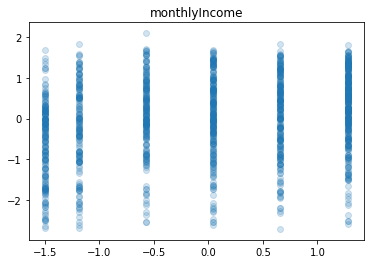

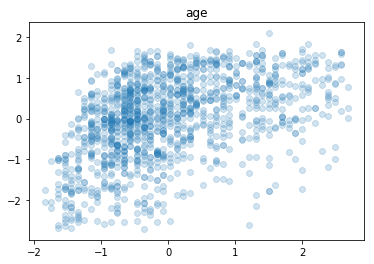

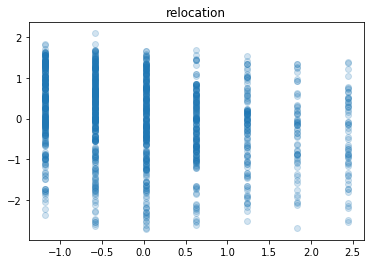

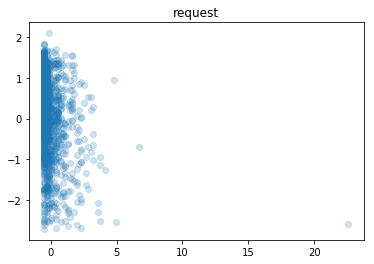

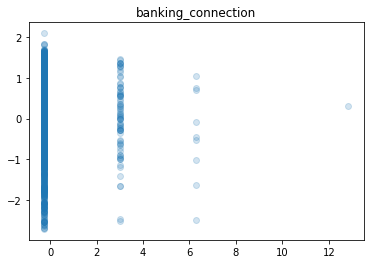

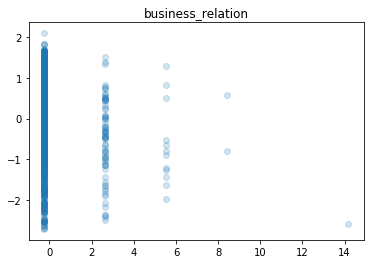

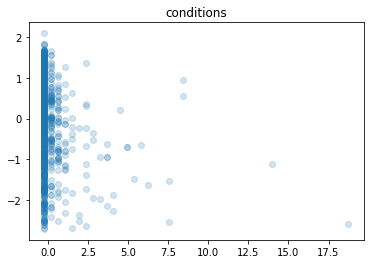

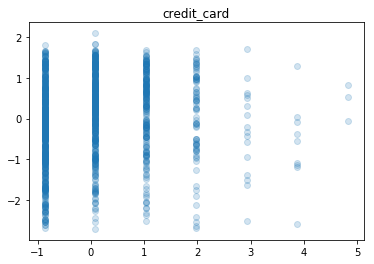

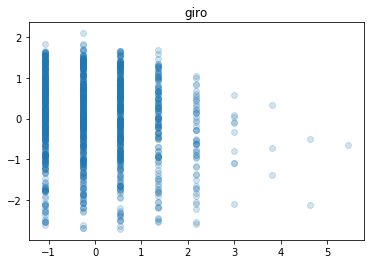

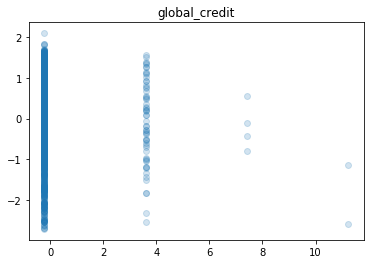

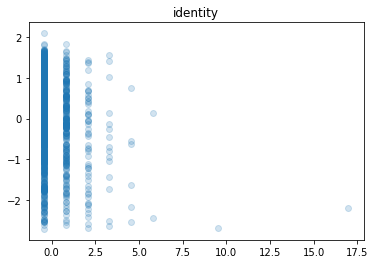

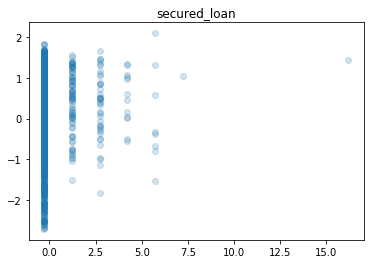

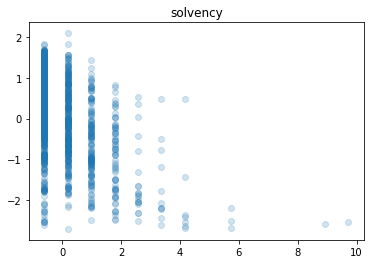

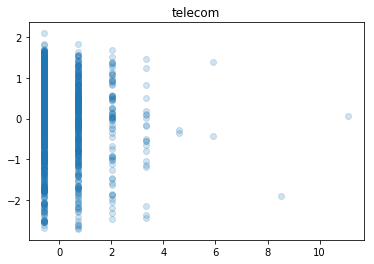

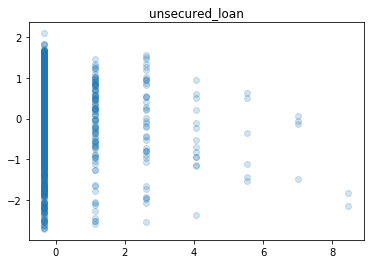

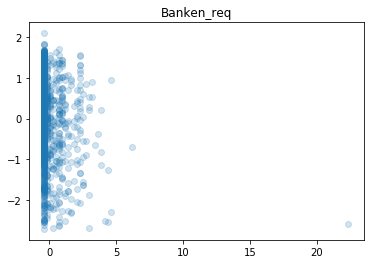

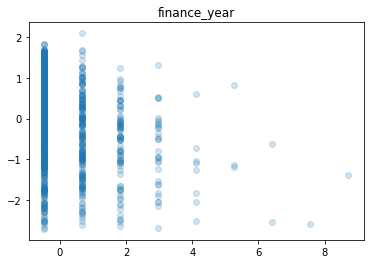

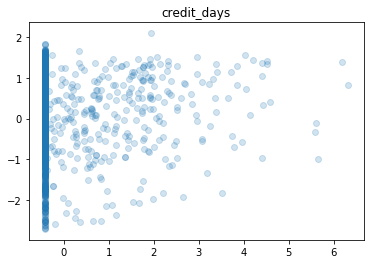

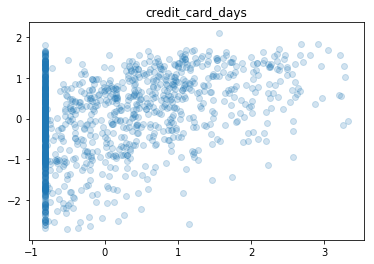

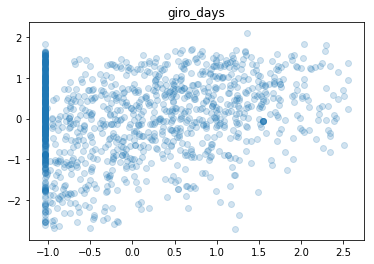

In [50]:
y_scaled = standardize_data(Xy["score"].values.reshape(-1, 1))

for feat in metric:
    x_scaled = standardize_data(Xy[feat].values.reshape(-1, 1))
    plt.scatter(x_scaled, y_scaled, alpha=.2)
    plt.title(feat)
    plt.show()
    plt.close()

=> We remove all values in count data with a z-score of >= 10

In [52]:
outlier_ids = []
for v in [1,2,3]:
    for dom in ["Versandhandel", "Banken"]:
        for feat in counts:
            X = df_original[(df_original.domain==dom)&(df_original.version==v)][["id"]+counts].dropna()
            z = standardize_data(X[feat].values.reshape(-1, 1))
            
            outl = X[z >= 10].id
            
            for o in outl:
                if o not in outlier_ids:
                    print("Found %d new Outliers in %s, %s, %d"%(len(outl), feat, dom, v))
                    outlier_ids.append(o)
            
            outlier_ids.extend(outl.values.tolist())

Found 1 new Outliers in request, Versandhandel, 1
Found 1 new Outliers in banking_connection, Versandhandel, 1
Found 2 new Outliers in conditions, Versandhandel, 1
Found 2 new Outliers in global_credit, Versandhandel, 1
Found 1 new Outliers in identity, Versandhandel, 1
Found 2 new Outliers in secured_loan, Versandhandel, 1
Found 2 new Outliers in secured_loan, Versandhandel, 1
Found 1 new Outliers in solvency, Versandhandel, 1
Found 1 new Outliers in telecom, Versandhandel, 1
Found 3 new Outliers in conditions, Banken, 1
Found 2 new Outliers in business_relation, Banken, 2
Found 4 new Outliers in conditions, Banken, 2
Found 4 new Outliers in conditions, Versandhandel, 3
Found 1 new Outliers in identity, Versandhandel, 3


In [53]:
len(outlier_ids)

96

In [64]:
df_nooutliers = df_original[~df_original.id.isin(outlier_ids)]

In [24]:
df_original.id.unique().shape

(1944,)

In [65]:
df_nooutliers.id.unique().shape

(1930,)

In [21]:
df_original.to_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final.csv", index=False, sep=";")

In [62]:
df_nooutliers.to_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final_cleaned.csv", index=False, sep=";")

In [22]:
# We do not use the random samples, because we will use matching instead
"""df_sex.to_csv(data_path + "SPON_dataset_tables/20190331_analysis_dataset_subsample_sex.csv", index=False, sep=";")
df_age.to_csv(data_path + "SPON_dataset_tables/20190331_analysis_dataset_subsample_age.csv", index=False, sep=";")""";